<!-- dom:TITLE: Numerical solution of nonlinear equations -->
# Numerical solution of nonlinear equations
<!-- dom:AUTHOR: Anne Kværnø (modified by André Massing) -->
<!-- Author: -->  
**Anne Kværnø (modified by André Massing and Markus Grasmair)**

Date: **May 27, 2020** <br>
Revision: **Oct 11, 2020**

If you want to have a nicer theme for your jupyter notebook,
download the [cascade stylesheet file tma4125.css](https://www.math.ntnu.no/emner/TMA4125/2020v/part_II/notebooks/tma4125.css)
and execute the next cell:

In [4]:
from IPython.core.display import HTML
def css_styling():
    styles = open("tma4125.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

# Introduction
We know that the quadratic equations of the form

$$
ax^2 + bx + cx = 0
$$

has the roots

$$
r^{\pm} = \dfrac{-b \pm \sqrt{b^2 - 4ac}}{2a}.
$$

More generally, for a given function $f$,
a number $r$ satisfying $f(r) = 0$
is called a *root* (or *solution*) to the equation

$$
f(x) \overset{!}{=} 0.
$$

In many applications, we encounter such equations
for which we do not have a simple solution formula
as for quadratic functions.
In fact, an analytical solution formula might not even exist!
Thus the goal of the chapter is to develop some numerical techniques for solving nonlinear
scalar equations (one equation, one unknown), such as, for example

$$
x^3+x^2-3x=3.
$$

or systems of equations, such as, for example

$$
\begin{align*}
xe^y &= 1,    \\ 
-x^2+y &= 1.
\end{align*}
$$

**NB!**
* We refer to section 3.1 in *Preliminaries* for some general comments on convergence. 

* There are no examples of numerical calculations done by hand in this
  note. If you would like some, you can easily generate them
  yourself. Take one of the computer exercises, do your calculations
  by hand, if needed modify the code so that you get the output you
  want, run the code, and compare with the results you got by your
  pencil and paper calculation.

# Scalar equations
In this section we discuss the solution of scalar equations. The
techniques we will use are known from previous courses. When they are
repeated here, it is because the techniques used to develop and
analyse these methods can, at least in principle, be extended to
systems of equations. We will also emphasise the error analysis of the
methods.

A scalar equation is given by

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
f(x) = 0,
\label{_auto1} \tag{1}
\end{equation}
$$

where $f$ is a continuous function defined on some interval $[a,b]$. A
solution $r$ of the equation is called a *zero* or a *root* of $f$. A
nonlinear equation may have one, more than one, or no roots.


**Example 1:**
Given the function $f(x)=x^3+x^2-3x-3$ on the interval $[-2,2]$.  Plot
the function on the interval, and locate possible roots.

In [5]:
%matplotlib inline

import numpy as np
from numpy import pi
from numpy.linalg import solve, norm    # Solve linear systems and compute norms
import matplotlib.pyplot as plt

newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

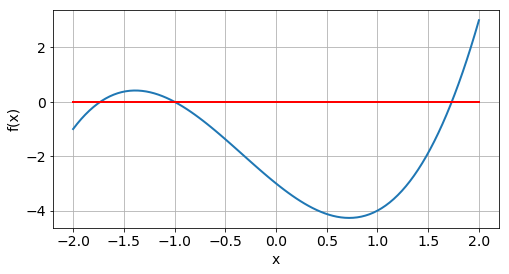

In [6]:
def f(x):                   # Define the function
    return x**3+x**2-3*x-3

# Plot the function on an interval 
x = np.linspace(-2, 2, 101)    # x-values (evaluation points)
plt.plot(x, f(x))               # Plot the function
plt.plot(x, 0*x, 'r')           # Plot the x-axis
plt.xlabel('x')
plt.grid(True)
plt.ylabel('f(x)');

According to the plot, the function $f$ has three real roots in the interval
$[-2, 2]$. 

The function can be rewritten as

$$
f(x) = x^3+x^2-3x-3 = (x+1)(x^2-3).
$$

Thus the roots of $f$ are $-1$ and $\pm \sqrt{3}$. We will use this
example as a test problem later on.

## Existence and uniqueness of solutions
The following theorem is well known:

**Theorem 1: Existence and uniqueness of a solution.**

* If $f\in C[a,b]$ with $f(a)$ and $f(b)$ of opposite sign, then there exist at least one $r\in (a,b)$ such that $f(r)=0$. 

* The solution is unique if $f\in C^1[a,b]$ and $f'(x)>0$ or $f'(x)<0$ for all $x\in (a,b)$.



The first condition guarantees that the graph of $f$ will pass the
$x$-axis at some point $r$, the second guarantees that the function is
either strictly increasing or strictly decreasing.

We note that the condition that $f(a)$ and $f(b)$ are of opposite sign can be
summarised in the condition that $f(a)\cdot f(b) < 0$.


## Bisection method
The first part of the theorem can be used to construct the first,
quite intuitive algorithm for solving scalar equations. Given an
interval, check if $f$ has a root in the interval (by comparing the signs
of the function values at the end-points), divide it in two,
check in which of the two halfs the root is, and continue until a root
is located with sufficient accuracy.

**Bisection method.**

  * Given the function $f$ and the interval $I_0 := [a,b]$, such that $f(a)\cdot f(b)<0$.

  * Set $a_0=a$, $b_0=b$.

  * For $k=0,1,2,3,\ldots$

   * $\displaystyle  c_k =\frac{a_k+b_k}{2}$

   * $\displaystyle I_{k+1} := [a_{k+1},b_{k+1}] = \begin{cases} [a_k,c_k] & \text{if } f(a_k)\cdot f(c_k) \leq 0 \\ [c_k,b_k] & \text{if } f(b_k)\cdot f(c_k) \leq 0 \end{cases}$



Use $c_k$ as the approximation to the root. Since $c_k$ is the
midpoint of the interval $[a_k,b_k]$, the error satisfies
$|c_k-r|\leqslant (b_k-a_k)/2$.
The loop is terminated when $(b_k-a_k)/2$ is smaller than some user
specified tolerance. Since the length of interval $I_k$ satisfies
$(b_k - a_k) = 2^{-k} (b-a)$, we  also have an a priori estimate of the error
after $k$ bisections,

$$
|c_k-r|
\leqslant
\dfrac{1}{2}(b_k-a_k)
\leqslant
\dfrac{1}{2^{k+1}}(b-a)
$$

Consequently, we can estimate how many bisections we have to perform to
compute a root up to a given tolerance $\texttt{tol}$ by simply requiring that

$$
\begin{align*}
 \dfrac{1}{2^{k+1}}(b-a) \leqslant \texttt{tol}
\Leftrightarrow
\dfrac{b-a}{2\;\texttt{tol}} \leqslant 2^k
\Leftrightarrow
\dfrac{
\log
\Bigl(
\dfrac{b-a}{2\;\texttt{tol}}
\Bigr)
}{\log 2}
\leqslant k.
\end{align*}
$$

We will of course also terminate
the loop if $f(c_k)$ is very close to 0.


### Implementation

The algorithm is implemented in the function `bisection()`.

In [7]:
def bisection(f, a, b, tol=1.e-6, max_iter = 100):
    # Solve the scalar equation f(x)=0 by bisection 
    # The result of each iteration is printed
    # Input:
    #   f:        The function. 
    #   a, b:     Interval: 
    #   tol :     Tolerance
    #   max_iter: Maximum number of iterations
    # Output:
    #   the root and the number of iterations.

    fa = f(a)
    fb = f(b)
    if fa*fb > 0:
        print('Error: f(a)*f(b)>0, there may be no root in the interval.')
        return 0, 0
    for k in range(max_iter):
        c = 0.5*(a+b)               # The midpoint
        fc = f(c)                   
        print('k ={:3d}, a = {:.6f}, b = {:.6f}, c = {:10.6f}, f(c) = {:10.3e}'
              .format(k, a, b, c, fc)) 
        if abs(f(c)) < 1.e-14 or (b-a) < 2*tol:     # The zero is found!
            break 
        elif fa*fc <= 0:               
            b = c                     # There is a root in [a, c]
        else:
            a = c                     # There is a root in [c, b]  
    return c, k

**Example 2:**
Use the code above to find the root of

$$
f(x)=x^3+x^2-3x-3
$$

in the
interval $[1.5,2]$. Use $10^{-6}$ as the tolerance.

In [8]:
# Example 2
def f(x):                   # Define the function
    return x**3+x**2-3*x-3
a, b = 1.5, 2               # The interval
c, nit = bisection(f, a, b, tol=1.e-6) # Apply the bisection method

k =  0, a = 1.500000, b = 2.000000, c =   1.750000, f(c) =  1.719e-01
k =  1, a = 1.500000, b = 1.750000, c =   1.625000, f(c) = -9.434e-01
k =  2, a = 1.625000, b = 1.750000, c =   1.687500, f(c) = -4.094e-01
k =  3, a = 1.687500, b = 1.750000, c =   1.718750, f(c) = -1.248e-01
k =  4, a = 1.718750, b = 1.750000, c =   1.734375, f(c) =  2.203e-02
k =  5, a = 1.718750, b = 1.734375, c =   1.726562, f(c) = -5.176e-02
k =  6, a = 1.726562, b = 1.734375, c =   1.730469, f(c) = -1.496e-02
k =  7, a = 1.730469, b = 1.734375, c =   1.732422, f(c) =  3.513e-03
k =  8, a = 1.730469, b = 1.732422, c =   1.731445, f(c) = -5.728e-03
k =  9, a = 1.731445, b = 1.732422, c =   1.731934, f(c) = -1.109e-03
k = 10, a = 1.731934, b = 1.732422, c =   1.732178, f(c) =  1.201e-03
k = 11, a = 1.731934, b = 1.732178, c =   1.732056, f(c) =  4.596e-05
k = 12, a = 1.731934, b = 1.732056, c =   1.731995, f(c) = -5.317e-04
k = 13, a = 1.731995, b = 1.732056, c =   1.732025, f(c) = -2.429e-04
k = 14, a = 1.732025

Control that the numerical result is within the error tolerance:

In [9]:
r = np.sqrt(3)                  
print('The error: |c_k-r|={:.2e}'.format(abs(r-c)))

The error: |c_k-r|=8.81e-08


<!-- --- begin exercise --- -->

## Exercise 1: Bisection method
<div id="ex:bisection"></div>


**a)**
Compute the solution(s) of $x^2+\sin(x)-0.5=0$ by the bisection method.

**b)**
Compute the solution(s) of $x^2+\sin(x)-0.5=0$ by the bisection method.

**c)**
Given a root in the interval $[1.5, 2]$. How many iterations are required to guarantee that the error is less than $10^{-4}$.


<!-- --- end exercise --- -->


## Fixed point iterations
The bisection method is very robust, but not particular fast. In addition, the bisection method in that form can only be used for the solution of equations in a single variable, and it is difficult to use similar methods for systems of equations in several variables.

We will therefore discuss a major class of iteration schemes, namely the so-called fixed point iterations. The idea is: 

* Given a scalar equation $f(x)=0$ with a root $r$. 

* Rewrite the equation in *fixed point form* $x=g(x)$ such that the root $r$ of $f$ is a *fixed point* of $g$, that is, $r$ satisfies $r=g(r)$. 

The fixed point iterations are then given by

**Fixed point iterations.**

  * Given $g$ and a starting value $x_0$. 

  * For $k=0,1,2,3,\dotsc$

    * $x_{k+1}=g(x_k)$




### Implementation

The fixed point scheme is implemented in the function `fixedpoint`. 
The iterations are terminated when either the error estimate $|x_{k+1}-x_k|$ is less than a given tolerance `tol`, or the number of iterations reaches some maximal number `max_iter`.

In [10]:
def fixedpoint(g, x0, tol=1.e-8, max_iter=30):
    # Solve x=g(x) by fixed point iterations
    # The output of each iteration is printed
    # Input:
    #   g:   The function g(x)
    #   x0:  Initial values
    #   tol: The tolerance
    # Output:
    #   The root, the number of iterations
    x = x0
    print('k ={:3d}, x = {:14.10f}'.format(0, x))  
    for k in range(max_iter):        
        x_old = x                        # Store old values for error estimation 
        x = g(x)                         # The iteration
        err = abs(x-x_old)               # Error estimate
        print('k ={:3d}, x = {:14.10f}'.format(k+1, x))
        if err < tol:          # The solution is accepted 
            break
    return x, k+1

**Example 3:**
The equation

$$
x^3+x^2-3x-3=0 \qquad \text{can be rewritten as} \qquad x=\frac{x^3+x^2-3}{3}.
$$

The fixed points are the intersections of the two graphs $y=x$ and $y=\frac{x^3+x^2-3}{3}$, as can be demonstrated by the following script:

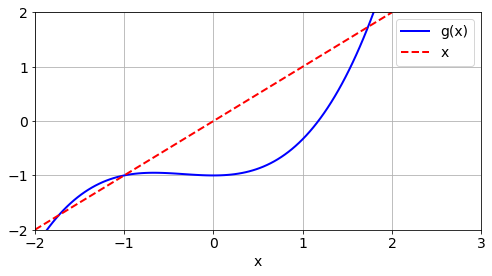

In [11]:
# Example 3
x = np.linspace(-2, 2, 101)
plt.plot(x, (x**3+x**2-3)/3,'b', x, x, '--r' )
plt.axis([-2, 3, -2, 2])
plt.xlabel('x')
plt.grid('True')
plt.legend(['g(x)','x']);

We observe that the fixed points of $g$ are the same as the zeros of $f$. 

Apply fixed point iterations on $g(x)$. Aim for the fixed point between 1 and 2, so choose $x_0=1.5$.
Do the iterations converge to the root $r=\sqrt{3}$?

In [12]:
# Solve the equation from example 3 by fixed point iterations.

# Define the function
def g(x):       
    return (x**3+x**2-3)/3

# Apply the fixed point scheme
x, nit = fixedpoint(g, x0=1.5, tol=1.e-6, max_iter=30)

print('\n\nResultat:\nx = {}, antall iterasjoner={}'.format(x, nit))

k =  0, x =   1.5000000000
k =  1, x =   0.8750000000
k =  2, x =  -0.5214843750
k =  3, x =  -0.9566232041
k =  4, x =  -0.9867682272
k =  5, x =  -0.9957053567
k =  6, x =  -0.9985807218
k =  7, x =  -0.9995282492
k =  8, x =  -0.9998428981
k =  9, x =  -0.9999476491
k = 10, x =  -0.9999825515
k = 11, x =  -0.9999941841
k = 12, x =  -0.9999980614
k = 13, x =  -0.9999993538
k = 14, x =  -0.9999997846


Resultat:
x = -0.9999997845980656, antall iterasjoner=14


<!-- --- begin exercise --- -->

## Exercise 2: Fixed point method part I

Repeat the experiment with the following reformulations of $f(x)=0$:

$$
\begin{align*}
   x &= g_2(x) = \frac{-x^2+3x+3}{x^2}, \\ 
   x &= g_3(x) = \sqrt[3]{3+3x-x^2}, \\ 
   x &= g_4(x) = \sqrt{\frac{3+3x-x^2}{x}}
   \end{align*}
$$

Use $x_0=1.5$ in your experiments, you may well experiment with other values as well.

<!-- --- end exercise --- -->


## Theory
Let us first state some existence and uniqueness results. Apply
Theorem 1 in this note on the equation $f(x) = x-g(x)=0$. The
following is then given (the details are left to the reader):
* If $g\in C[a,b]$ and $a < g(x) < b$ for all $x\in [a,b]$ then $g$ has at
  least one fixed point $r\in (a,b)$.

* If in addition $g\in C^1[a,b]$ and $|g'(x)|<1$ for all $x\in [a,b]$
  then the fixed point is unique.

In the following, we will write the assumption $a<g(x)<b$ for all
$x\in [a,b]$ as $g([a,b])\subset (a,b)$.

In this section we will discuss the convergence properties of the
fixed point iterations, under the conditions for existence and
uniqueness given above.

The error after $k$ iterations is given by $e_k = r-x_k$. The
iterations converge when $e_k \rightarrow 0$ as $k\rightarrow
\infty$. Under which conditions is this the case?

This is the trick: 
For every $k$ we have

$$
\begin{align*}
x_{k+1}&=g(x_k),  && \text{the iterations}\\ 
r &= g(r).        && \text{the fixed point}
\end{align*}
$$

Take the difference between those and use the mean value theorem
(Result 3 in section 5 in *Preliminaries*), and finally take the
absolute value of each expression in the sequence of equalities:

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
|e_{k+1}| = |r-x_{k+1}| = |g(r)-g(x_k)| = |g'(\xi_k)|\cdot|r-x_k| = |g'(\xi_k)|\cdot |e_k|.  
\label{_auto2} \tag{2}
\end{equation}
$$

Here $\xi_k$ is some unknown value between $x_k$ (known) and $r$
(unknown). We can now use the assumptions from the existence and
uniqueness result.
* The condition $g([a,b])\subset(a,b)$ guarantees that if $x_0\in
  [a,b]$ then $x_k \in (a,b)$ for $k=1,2,3,\dotsc$.

* The condition $|g'(x)|\leq L < 1$ guarantees convergence towards the
  unique fixed point $r$, since

$$
|e_{k+1}| \leq L \,|e_k| \qquad \Rightarrow \qquad |e_k| \leq L^k \,
   |e_0| \rightarrow 0\quad \text{as $k\rightarrow \infty$},
$$

and $L^k \rightarrow 0$ as $k\rightarrow\infty$ when $L<1$.

In addition, we have that
$$
\lvert x_{k+1} - x_{k}\rvert = \lvert g(x_{k}) - g(x_{k-1})\rvert
= \lvert g'(\xi_{k})\rvert \cdot \lvert x_{k}-x_{k-1}\rvert
$$
for some $\xi_k$ between $x_{k-1}$ and $x_{k}$, which shows that
$$
\lvert x_{k+1} - x_{k} \rvert \le L \lvert x_{k}-x_{k-1}\rvert.
$$
Repeating this argumentation $k$-times yields the estimate
$$
\lvert x_{k+1} - x_k\rvert \le L^k \lvert x_1 - x_0 \rvert.
$$
As a consequence, since $r = \lim_{k\to\infty} x_k$,
we obtain that
$$
\lvert x_1 - r \rvert = \Bigl\lvert \sum_{k=0}^\infty (x_{k+1}-x_{k+2})\Bigr\rvert
\le \sum_{k=0}^\infty \lvert x_{k+1}-x_{k+2}\rvert
\le \sum_{k=0}^\infty L^{k+1} \lvert x_1 - x_0\rvert
= \frac{L}{1-L} \lvert x_1 - x_0 \rvert.
$$
A similar argumentation (but now starting at $x_k$ instead of $x_1$)
yields that
$$
\lvert x_{k+1} - r \rvert \le \frac{L}{1-L}\lvert x_{k+1}-x_k\rvert
\le \frac{L^{k+1}}{1-L} \lvert x_1 - x_0\rvert.
$$

In summary we have

**The fixed point theorem.**

If there is an interval $[a,b]$ such that $g\in C^1[a,b]$,
$g([a,b])\subset (a,b)$ and there exist a positive constant $L<1$ such
that $|g'(x)|\leq L <1$ for all $x\in[a,b]$ then the following hold:
* $g$ has a unique fixed point $r$ in $(a,b)$.

* The fixed point iterations $x_{k+1}=g(x_k)$ converges towards $r$
  for all starting values $x_0 \in [a,b]$.

* The error $e_{k+1} = r-x_{k+1}$ after iteration $k+1$ satisfies the estimates

  * $|e_{k+1}| \leqslant L |e_k|$ $\quad\ldots$ error reduction rate,

  * $|e_{k+1}| \leqslant \dfrac{L^{k+1}}{1 - L} |x_1 - x_0|$ $\quad\ldots$ a-priori error estimate.

  * $|e_{k+1}| \leqslant \dfrac{L}{L-1} |x_{k+1}-x_k|$ $\quad\ldots$ a-posteriori error estimate.

From the discussion above, we can draw some conclusions: 
* The smaller the constant $L$, the faster the convergence.

* If $|g'(r)|<1$ then there will always be an interval
  $(r-\delta, r+\delta)$ around $r$ for some $\delta > 0$ on which all the conditions
  are satisfied. Meaning that the iterations will always converge if
  $x_0$ is sufficiently close to $r$.

* If $|g'(r)|>1$, a similar argumentation shows that the fixed point iterates
  move away from the point $r$. In practice, this means that the fixed point
  iteration in this case will never converge towards $r$.
    
* If the constant $L$ is known, the a-priori error estimate can be used in order
  to estimate the number of steps it takes in order to obtain an error that is
  smaller than some specified tolerance $\texttt{tol}$. To that end, we simply have
  to solve the inequality
  $$
  \frac{L^{k+1}}{1-L} \lvert x_1 - x_0\rvert \le \texttt{tol}
  $$
  for $k$.
  
* The a-posteriori estimate can be used to estimate the actual error
  based on the size of the last update $\lvert x_{k+1}-x_k\rvert$.
  
* If the constant $L$ is *not* known, one can estimate it using the
  ideas found in $\texttt{preliminaries.ipynb}$. Then one can use this
  estimate of $L$ in the a-posteriori error estimate in order to estimate
  the actual error.

**Example 3 revisited:**
Use the theory above to analyse the iteration scheme from Example 3, where

$$
g(x)=\frac{x^3+x^2-3}{3}, \qquad g'(x) = \frac{3x^2+2x}{3}
$$

It is clear that $g$ is differentiable. We already know that $g$ has three
fixed points, $r=\pm\sqrt{3}$ and $r=-1$. For the first two, we have that
$g'(\sqrt{3}) = 3+\frac{2}{3}\sqrt{3} = 4.15$ and
$g'(-\sqrt{3})=3-\frac{2}{3}\sqrt{3}=1.85$, so the fixed point iterations will
never converges towards those roots. But $g'(-1)=1/3$, so we get convergence towards
this root, given sufficiently good starting values. The figure below demonstrates
that the assumptions of the theorem are satisfied in some region around $x=-1$, for example
$[-1.3, -0.7]$.

In [13]:
plt.rcParams['figure.figsize'] = 10, 5   # Resize the figure for a nicer plot

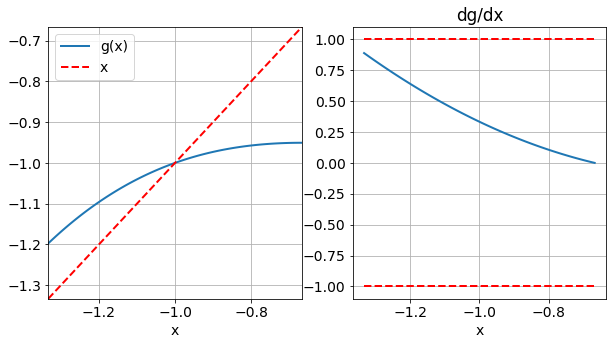

In [14]:
# Demonstrate the assumptions of the fixed point theorem

def g(x):                           # The function g(x)
    return (x**3+x**2-3)/3

def dg(x):                          # The derivative g'(x)
    return (3*x**2+2*x)/3

a, b = -4/3, -2/3                   # The interval [a,b] around r.
x = np.linspace(a, b, 101)             # x-values on [a,b]
y_is_1 = np.ones(101)                  # For plotting the  for g' 


plt.rcParams['figure.figsize'] = 10, 5   # Resize the figure
# Plot x and g(x) around the $r=-1$.
plt.subplot(1,2,1)
plt.plot(x, g(x), x, x, 'r--')
plt.xlabel('x')
plt.axis([a,b,a,b])
plt.grid(True)
plt.legend(['g(x)','x'])

# Plot g'(x), and the limits -1 and +1
plt.subplot(1,2,2)
plt.plot(x, dg(x), x, y_is_1, 'r--', x, -y_is_1, 'r--');
plt.xlabel('x')
plt.grid(True)
plt.title('dg/dx');

In [15]:
# run the fixed point iteration starting at x_0 = -4/3
x, nit = fixedpoint(g, x0=-2/3, tol=1.e-6, max_iter=30)

print('\n\nResultat:\nx = {}, antall iterasjoner={}'.format(x, nit))

k =  0, x =  -0.6666666667
k =  1, x =  -0.9506172840
k =  2, x =  -0.9851247206
k =  3, x =  -0.9951879923
k =  4, x =  -0.9984113972
k =  5, x =  -0.9994721469
k =  6, x =  -0.9998242347
k =  7, x =  -0.9999414321
k =  8, x =  -0.9999804797
k =  9, x =  -0.9999934935
k = 10, x =  -0.9999978312
k = 11, x =  -0.9999992771
k = 12, x =  -0.9999997590


Resultat:
x = -0.9999997590221911, antall iterasjoner=12


The plot to the left demonstrates the assumption $g([a,b])\subset(a,b)$, as  the graph $y=g(x)$ 
enters at the left boundary and exits at the right and does not leave the region $[a,b]$ anywhere in between. 
The plot to the right shows that $|g'(x)|\leq |g'(a)| = L < 1$ is satisfied in the interval. 



<!-- --- begin exercise --- -->

## Exercise 3: Fixed point method part II


**a)**
See how far the interval $[a,b]$ can be stretched, still with convergence guaranteed.

**b)**
Do a similar analysis on the three other iteration schemes suggested above, and confirm the results numerically. The schemes are:

$$
\begin{align*}
   x = g_2(x) = \frac{-x^2+3x+3}{x^2}, \\ 
   x = g_3(x) = \sqrt[3]{3+3x-x^2}, \\ 
   x = g_4(x) = \sqrt{\frac{3+3x-x^2}{x}}
\end{align*}
$$

In [16]:
# Insert your code here.



**Example 3 revisited:**
The fixed point theorem stated that $|e_{k+1}| \leqslant L |e_k|$
with $L < 1$ and thus the fixed point iteration is *linearly convergent*.

In [17]:
def eocs(errs):
    # Computes the experimentally observed convergence rates for a
    # list of iterates
    #   errs:    list of computed errors
    # Output:
    #   list of computed eocs

    if (len(errs) < 3):
        print('Error: Need at least 3 iterates to compute EOCs')

    # (Recall list indexing and slicing in Python if you trouble
    # to understand the next line)
    ps = np.log(errs[2:]/errs[1:-1])/np.log(errs[1:-1]/errs[:-2])

    # Print 
    for k in range(len(ps)):
        print("k = {:3d}, eoc(k) = {:3.3f}".format(k+2, ps[k]))

    return ps

We will also modify the `fixedpoint()` function so that it returns
not only the last iteration, but all iterations, so that we can
compute the estimated order of convergence.

In [18]:
def fixedpoint_v2(g, x0, tol=1.e-8, max_iter=30):
    # Solve x=g(x) by fixed point iterations
    # The output of each iteration is printed
    # Input:
    #   g:   The function g(x)
    #   x0:  Initial values
    #   tol: The tolerance
    # Output:
    #   List of iterations
    x = [x0]
    print('k ={:3d}, x = {:14.10f}'.format(0, x[-1]))  
    for k in range(max_iter):        
        x.append(g(x[-1]))
        err = abs(x[-1]-x[-2])               # Error estimate
        print('k ={:3d}, x = {:14.10f}'.format(k+1, x[-1]))
        if err < tol:          # The solution is accepted 
            break
    # Return as numpy array
    return np.array(x)

Now we can rerun example 3 with $g(x) = (x^3+x^2-3)/3$ and
compute the estimated order of convergence:

In [19]:
## Compute the eoc for the fixed point method when solving example 3.

# Define the function
def g(x):       
    return (x**3+x**2-3)/3

# Apply the fixed point scheme
x = fixedpoint_v2(g, x0=-2/3, tol=1.e-6, max_iter=30)

# Compute x_k - r,
r = -1 # exact solution
errs = x - r # error for each iterate

# Find the order and the error constant C
print('\nThe order p and the error constant C')
for k in range(len(errs)-2):
    p = np.log(np.abs(errs[k+2]/errs[k+1]))/np.log(np.abs(errs[k+1]/errs[k]))
    C = np.abs(errs[k+2])/np.abs(errs[k+1])**p
    print('k = {:2d},  p = {:4.2f},  C = {:6.4f}'.format(k, p, C))

k =  0, x =  -0.6666666667
k =  1, x =  -0.9506172840
k =  2, x =  -0.9851247206
k =  3, x =  -0.9951879923
k =  4, x =  -0.9984113972
k =  5, x =  -0.9994721469
k =  6, x =  -0.9998242347
k =  7, x =  -0.9999414321
k =  8, x =  -0.9999804797
k =  9, x =  -0.9999934935
k = 10, x =  -0.9999978312
k = 11, x =  -0.9999992771
k = 12, x =  -0.9999997590

The order p and the error constant C
k =  0,  p = 0.63,  C = 0.0985
k =  1,  p = 0.94,  C = 0.2519
k =  2,  p = 0.98,  C = 0.2999
k =  3,  p = 0.99,  C = 0.3200
k =  4,  p = 1.00,  C = 0.3282
k =  5,  p = 1.00,  C = 0.3314
k =  6,  p = 1.00,  C = 0.3326
k =  7,  p = 1.00,  C = 0.3331
k =  8,  p = 1.00,  C = 0.3332
k =  9,  p = 1.00,  C = 0.3333
k = 10,  p = 1.00,  C = 0.3333


## Newton's method
Based on the previous discussion, it is clear that fast convergence
can be achieved if $g'(r)$ is as small as possible, preferably
$g'(r)=0$. Can this be achieved for a general problem?

We have that $x_k=r-e_k$ where $e_k$ is the error in iteration $k$. Do
a Taylor expansion (*Preliminaries*, section 4) of $g(x_k)$ around
$r$:

$$
   e_{k+1} = r-x_{k+1} = g(r)-g(x_k) = g(r)-g(r-e_k) = -g'(r)e_k + \frac{1}{2}g''(\xi_k)e_k^2.
$$

If  $g'(r)=0$ and there is a constant $M$ such that $|g''(x)|/2 \leq M$,
then

$$
|e_{k+1}| \leq M |e_k|^2
$$

and *quadratic convergence* has been achieved, see *Preliminaries*, section 3.1 on "Convergence of an iterative process".  

*Question*: Given the equation $f(x)=0$ with an unknown solution
 $r$. Can we find a $g$ with $r$ as a fixed point, satisfying
 $g'(r)=0$?

*Idea*: Let

$$
g(x)=x-h(x)f(x).
$$

for some function $h(x)$. Independent of the choice of $h(x)$, $r$ will be a fixed point of $g$. 
Choose $h(x)$ such that $g'(r)=0$, that is

$$
g'(x) = 1 - h'(x)f(x) - h(x)f'(x) \qquad \Rightarrow \qquad
g'(r) = 1 - h(r)f'(r)
$$

That is, we have to choose $h(x)$ in such a way that $h(r) = 1/f'(r)$. There are
several choices for $h$ with this property, but the most obvious one is the
choose $h(x)=1/f'(x)$.
The result is 

**Newton's method.**

  * Given $f$ and $f'$, and a starting value $x_0$. 

  * For $k=0,1,2,3,\dotsc$

    * $\displaystyle x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$



### Implementation

The method is implemented in the function `newton()`. The iterations are terminated when 
$|f(x_k)|$ is less than a given tolerance.

In [20]:
def newton(f, df, x0, tol=1.e-8, max_iter=30):
    # Solve f(x)=0 by Newtons method
    # The output of each iteration is printed
    # Input:
    #   f, df:   The function f and its derivate f'.
    #   x0:  Initial values
    #   tol: The tolerance
    # Output:
    #   The root and the number of iterations
    x = x0
    print('k ={:3d}, x = {:18.15f}, f(x) = {:10.3e}'.format(0, x, f(x)))
    for k in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:           # Accept the solution 
            break 
        x = x - fx/df(x)            # Newton-iteration
        print('k ={:3d}, x = {:18.15f}, f(x) = {:10.3e}'.format(k+1, x, f(x)))
    return x, k+1

**Example 4:**
Solve $f(x)=x^3+x^2-3x-3=0$ by Newton's method. Choose $x_0=1.5$. 
The derivative of $f$ is $f'(x)=3x^2+2x-3$.

In [28]:
# Example 4
def f(x):                   # The function f
    return x**3+x**2-3*x-3

def df(x):                  # The derivative f'
    return 3*x**2+2*x-3

x0 = -4/3                      # Starting value
x, nit = newton(f, df, x0, tol=1.e-14, max_iter=30)  # Apply Newton
print('\n\nResult:\nx={}, number of iterations={}'.format(x, nit))

k =  0, x = -1.333333333333333, f(x) =  4.074e-01
k =  1, x = -0.111111111111110, f(x) = -2.656e+00
k =  2, x = -0.944875107665806, f(x) = -1.162e-01
k =  3, x = -0.997403215651661, f(x) = -5.207e-03
k =  4, x = -0.999993308904898, f(x) = -1.338e-05
k =  5, x = -0.999999999955230, f(x) = -8.954e-11
k =  6, x = -1.000000000000000, f(x) =  0.000e+00


Result:
x=-1.0, number of iterations=7


### Error analysis

The method was constructed to give quadratic convergence, that is

$$
|e_{k+1}| \leq M |e_k|^2,
$$

where  $e_k=r-x_k$ is the error after $k$ iterations. But under which conditions is this true, and can we say something about the size of the constant $M$?

By a Taylor expansion of $f(r)$ around $x_k$, we get:

$$
\begin{align*}
  0 = f(r) &= f(x_k) + f'(x_k)(r-x_k) + \frac{1}{2}f''(\xi_k)(r-x_k)^2
&& \text{(Taylor series)} \\ 
   0 &= f(x_k) + f'(x_k)(x_{k+1}-x_k) && \text{(Newton's method)}
\end{align*}
$$

where $\xi_k$ is between $r$ and $x_k$.

Subtract the two equations to get

$$
f'(x_k)(r-x_{k+1}) + \frac{1}{2}f''(\xi_{k})(r-x_k)^2 = 0
\qquad \Rightarrow \qquad
e_{k+1} = - \frac{1}{2} \frac{f''(\xi_k)}{f'(x_k)} e_k^2
$$

So we obtain quadratic convergence if $f$ is twice differentiable around $r$, $f'(x_k)\not=0$, and $x_0$ is chosen sufficiently close to $r$. More precisely:

**Theorem: Convergence of Newton iterations.**

Assume that the function $f$ has a root $r$, and let $I_\delta=[r-\delta, r+\delta]$ for some $\delta > 0$. Assume further that
* $f\in C^2(I_\delta)$. 

* There is a positive constant $M$ such that 

  * $\displaystyle \left| \frac{f''(y)}{f'(x)} \right| \leq 2M, \qquad \text{for all $x,y \in I_{\delta}$}$. 


In this case, Newton's iterations converge quadratically with

$$
|e_{k+1}| \leq M |e_k|^2
$$

for all starting values satisfying $|x_0-r| < \min\{1/M, \delta\}$.

Here the condition $\lvert x_0 - r \rvert \leq 1/M$ guarantees that
the error actually decreases in each step, since we have this condition
that $\lvert e_{k+1}\rvert \le M \lvert e_k \rvert^2 < \lvert e_k \rvert$.



<!-- --- begin exercise --- -->

## Exercise 4: Newton's method for a scalar equation


**a)**
Repeat Example 4 using different starting values $x_0$. Find the two other roots.

**b)**
Verify quadratic convergence numerically. How to do so is explained in *Preliminaries*, section 3.1.

**c)**
Solve the equation $x(1-\cos(x))=0$, both by the bisection method and
by Newton's method with $x_0=1$. Comment on the result.

<!-- --- end exercise --- -->


# System of nonlinear equations
In this section we will discuss how to solve systems of non-linear equations, given by

$$
\begin{align*}
   f_1(x_1, x_2, \dotsc, x_n) &= 0 \\ 
   f_2(x_1, x_2, \dotsc, x_n) &= 0 \\ 
                              & \vdots  \\ 
   f_n(x_1, x_2, \dotsc, x_n) &= 0 \\ 
\end{align*}
$$

or short by

$$
\mathbf{f}(\mathbf{x}) = \mathbf{0}.
$$

where $\mathbf{f}:\mathbb{R}^n \rightarrow \mathbb{R}^n$.


**Example 5:**
We are given the two equations

$$
\begin{align*}
x_1^3-x_2 + \frac{1}{4} &= 0,  \\ 
x_1^2+x_2^2 - 1  &= 0. \nonumber
\end{align*}
$$

This is illustrated in the following figure.

In [22]:
plt.rcParams['figure.figsize'] = 6, 6   # Resize the figure for a nicer plot

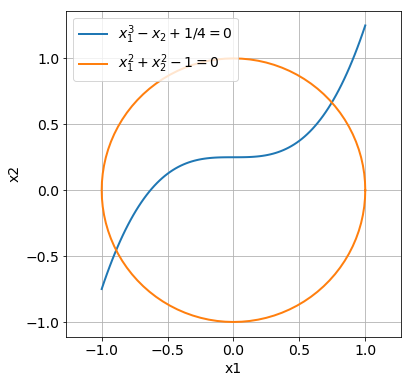

In [23]:
# Example 5 with graphs
x = np.linspace(-1.0, 1.0, 101)
plt.plot(x, x**3+0.25);
t = np.linspace(0,2*pi,101)
plt.plot(np.cos(t), np.sin(t)); 
plt.axis('equal');
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.legend(['$x_1^3-x_2+1/4=0$','$x_1^2+x_2^2-1=0$']);

The solutions of the two equations are the intersections of the two
graphs. So there are two solutions, one in the first and one in the
third quadrant. We will use this as a test example in the sequel.

## Newton's method for systems of equations
The idea of fixed point iterations can be extended to systems of equations. But it is in general hard to find convergent schemes. So we will concentrate on the extension of Newton's method to systems of equations. And for the sake of illustration, we only discuss systems of two equations and two unknowns written as

$$
\begin{align*}
f(x, y) &= 0, \\ 
g(x, y) &= 0,
\end{align*}
$$

to avoid getting completely lost in indices. 

Let  $\mathbf{r}= [r_x, r_y]^T$ be a solution to these equations and some $\hat{\mathbf{x}}=[\hat{x},\hat{y}]^T$ a known approximation to $\mathbf{r}$. We search for a better approximation. This can be done by replacing the nonlinear equation $\mathbf{f}(\mathbf{x})=\mathbf{0}$ by its linear approximation. This can be found by a multidimensional Taylor expansion around $\hat{\mathbf{x}}$:

$$
\begin{align*}
   f(x, y) &= f(\hat{x}, \hat{y})
   + \frac{\partial f}{\partial x}(\hat{x}, \hat{y})(x - \hat{x})
   + \frac{\partial f}{\partial y}(\hat{x}, \hat{y})(y - \hat{y}) + \dotsc \\ 
   g(x,y) &= g(\hat{x}, \hat{y})
   + \frac{\partial g}{\partial x}(\hat{x}, \hat{y})(x - \hat{x})
   + \frac{\partial g}{\partial y}(\hat{x}, \hat{y})(y - \hat{y}) + \dotsc 
\end{align*}
$$

where the $\dotsc$ represent higher order terms, which are small if $\hat{\mathbf{x}}\approx \mathbf{x}$. 
By ignoring these terms we get a *linear approximation* to $\mathbf{f}(\mathbf{x})$, and rather than solving the nonlinear original system, we can solve its linear approximation:

$$
\begin{align*}
   f(\hat{x}, \hat{y})
   + \frac{\partial f}{\partial x}(\hat{x}, \hat{y})(x - \hat{x})
   + \frac{\partial f}{\partial y}(\hat{x}, \hat{y})(y - \hat{y}) &= 0\\ 
   g(\hat{x}, \hat{y})
   + \frac{\partial g}{\partial x}(\hat{x}, \hat{y})(x - \hat{x})
   + \frac{\partial g}{\partial y}(\hat{x}, \hat{y})(y - \hat{y}) &= 0
\end{align*}
$$

or more compact

$$
\mathbf{f}(\hat{\mathbf{x}}) + J(\hat{\mathbf{x}})(\mathbf{x}-\hat{\mathbf{x}}) = 0,
$$

where the Jacobian  $J(\mathbf{x})$ is given by

$$
J(\mathbf{x}) =\left(\begin{array}{cc}
\frac{\partial f}{\partial x}(x, y) & \frac{\partial f}{\partial y}(x, y) \\ 
\frac{\partial g}{\partial x}(x, y) & \frac{\partial g}{\partial y}(x, y)
\end{array} \right)
$$

It is to be hoped that the solution of the linear equation $\mathbf{x}$ provides a better approximation to $\mathbf{r}$ than our initial guess $\hat{\mathbf{x}}$, so the process can be repeated, resulting in

**Newton's method for system of equations.**

* Given a function $\mathbf{f}(\mathbf{x})$, its Jacobian $J(\mathbf{x})$ and a starting value $\mathbf{x}_0$. 

* For $k=0,1,2,3,\dotsc$

  * Solve the system $J(\mathbf{x}_k)\Delta_k = - \mathbf{f}(\mathbf{x}_k)$. 

  * Let $\mathbf{x}_{k+1} = \mathbf{x}_k + \Delta_k$.

 

The strategy can be generalized to systems of $n$ equations in $n$ unknowns, in which case the Jacobian is given by:

$$
J(\mathbf{x}) = \left(\begin{array}{cccc}
\frac{\partial f_1}{\partial x_1}(\mathbf{x}) &
\frac{\partial f_1}{\partial x_2}(\mathbf{x}) & \dotsm &
\frac{\partial f_1}{\partial x_n}(\mathbf{x}) \\ 
\frac{\partial f_2}{\partial x_1}(\mathbf{x}) &
\frac{\partial f_2}{\partial x_2}(\mathbf{x}) & \dotsm &
\frac{\partial f_2}{\partial x_n}(\mathbf{x}) \\ 
\vdots & \vdots & & \vdots \\ 
\frac{\partial f_n}{\partial x_1}(\mathbf{x}) &
\frac{\partial f_n}{\partial x_2}(\mathbf{x}) & \dotsm &
\frac{\partial f_n}{\partial x_n}(\mathbf{x})
\end{array} \right).
$$


### Implementation

Newton's method for system of equations is implemented in the function `newton_system`. The numerical solution is accepted when all components of $\mathbf{f}(\mathbf{x}_k)$ are smaller than a tolerance in absolute value, that means when $\|\mathbf{f}(\mathbf{x}_k)\|_{\infty} < $ `tol`. See *Preliminaries*, section 1 for a description of norms.

In [24]:
np.set_printoptions(precision=15)          # Output with high accuracy

In [25]:
def newton_system(f, jac, x0, tol = 1.e-10, max_iter=20):
    x = x0
    print('k ={:3d}, x = '.format(0), x)
    for k in range(max_iter):
        fx = f(x)
        if norm(fx, np.inf) < tol:          # The solution is accepted. 
            break
        Jx = jac(x)
        try:
            delta = solve(Jx, -fx)
        except:
            print("Error in solving the Newton system")
            k = -1                          # return -1 as iteration number
            break
        x = x + delta            
        print('k ={:3d}, x = '.format(k+1), x)
    return x, k

**Example 6:**
Solve the equations from Example 5
by Newton's method, that is, the system
$$
\begin{align*}
x_1^3-x_2 + \frac{1}{4} &= 0,  \\ 
x_1^2+x_2^2 - 1  &= 0. \nonumber
\end{align*}
$$
The vector valued function $\mathbf{f}$ and the Jacobian $J$ are in this case

$$
\mathbf{f}(\mathbf{x}) =
\left(\begin{array}{c}
x_1^3-x_2 + \frac{1}{4} \\ 
x_1^2+x_2^2 - 1
\end{array} \right) \qquad \text{and} \qquad
J(\mathbf{x})  =
\left( \begin{array}{cc}
3x_1^2 & -1 \\ 2x_1 & 2x_2
\end{array} \right)
$$

We already know that the system has 2 solutions, one in the first and one in the third quadrant. To find the first one, choose $\mathbf{x}_0=[1,1]^T$ as starting value.

In [33]:
# Example 6

# The vector valued function. Notice the indexing. 
def f(x):               
    y = np.array([x[0]**3-x[1]+0.25, 
               x[0]**2+x[1]**2-1])
    return y

# The Jacobian
def jac(x):
    J = np.array([[3*x[0]**2, -1],
         [2*x[0],    2*x[1]]])
    return J

x0 = np.array([1.0, 1.0])          # Starting values
max_iter = 50
x, nit = newton_system(f, jac, x0, tol = 1.e-12, max_iter = max_iter)  # Apply Newton's method
  
print('\nTest: f(x)={}'.format(f(x)))
if nit == max_iter-1:
    print('Warning: Convergence has not been achieved')

k =  0, x =  [ 1.  1.]
k =  1, x =  [ 0.8125  0.6875]
k =  2, x =  [ 0.750687815833801  0.663959854014599]
k =  3, x =  [ 0.746302675769953  0.665623251157924]
k =  4, x =  [ 0.746281278080405  0.665630719318386]
k =  5, x =  [ 0.746281277575054  0.665630719499142]

Test: f(x)=[  1.110223024625157e-16   0.000000000000000e+00]


<!-- --- begin exercise --- -->

## Exercise 5: Newton's method for a system


**a)**
Search for the solution of Example 5 in the third quadrant by changing the initial values.

**b)**
Apply Newton's method to the system

$$
\begin{array}{rl}    x e^y &= 1, \\ -x^2 +y &= 1, \end{array} \qquad  \text{using $x_0=y_0=-1$}.
$$

### Final remarks

A complete error and convergence analysis of Newton's method for
systems is far from trivial, and outside the scope of this course. But
in summary:
If $\mathbf{f}$ is sufficiently differentiable, and there is a
solution $\mathbf{r}$ of the system $\mathbf{f}(\mathbf{x})=0$ and
$J(\mathbf{r})$ is nonsingular, then the Newton iterations will
converge quadratically towards $\mathbf{r}$ for all $\mathbf{x}_0$
sufficiently close to $\mathbf{r}$.

Finding solutions of nonlinear equations is difficult. Even if the
Newton iterations in principle will converge, it can be very hard to
find sufficient good starting values. Nonlinear equations can have
none or many solutions. Even when there are solutions, there is no
guarantee that the solution you find is the one you want.

If $n$ is large, each iteration is computationally expensive since the
Jacobian is evaluated in each iteration, and a linear system has to be solved.
In practice, some modified
and more efficient version of Newton's method will be used, maybe
together with more robust but slow algorithms for finding sufficiently
good starting values.
<!-- --- end exercise --- -->